# Manufacturers' New Orders
Jinny
Created on February 24th, 2023. 

**Manufacturers' New Orders: Nondefense Capital Goods Excluding Aircraft** is an economic indicator that measures the total value of new orders received by manufacturers for capital goods. It is reported monthly by U.S. Census Bureau as a part of Manufacturers' Shipments, Inventories, and Orders (M3) survey.

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

##1. Installation Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plotsize = (12,4)

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Download the Dataset file from the open source, and upload it to the `IndexK` folder.
3. Do `read_csv` on your Dataset file.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
  os.chdir('drive/MyDrive/DataTeam1/Index2')

Mounted at /content/drive


In [3]:
df = pd.read_csv('NEWORDER.csv') #Dataset file
df.head()

,DATE,NEWORDER
0,1992-02-01,33857.0
1,1992-03-01,35258.0
2,1992-04-01,35992.0
3,1992-05-01,36811.0
4,1992-06-01,36666.0


In [4]:
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.set_index('DATE') 
df["NEWORDER"] = pd.to_numeric(df['NEWORDER'], errors='coerce')
df.describe()

,NEWORDER
count,371.000000
mean,58524.374663
std,9016.279663
min,33857.000000
25%,51954.000000
50%,60564.000000
75%,65343.500000
max,75379.000000


In [5]:
# min-max normalization
df['NEWORDER'] = (df['NEWORDER']-df['NEWORDER'].min())/(df['NEWORDER'].max()-df['NEWORDER'].min())
df.describe()

,NEWORDER
count,371.000000
mean,0.594080
std,0.217145
min,0.000000
25%,0.435841
50%,0.643201
75%,0.758309
max,1.000000


## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

### 3.1 Visualize data

In [6]:
# df_weekly = df.resample('W').sum()
df_monthly = df.resample('M').mean()
df_quarterly = df.resample('Q').mean()
df_yearly = df.resample('Y').mean()

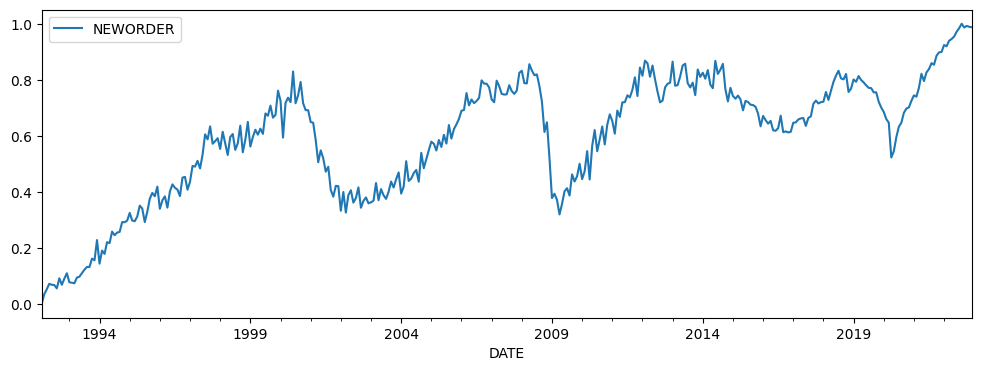

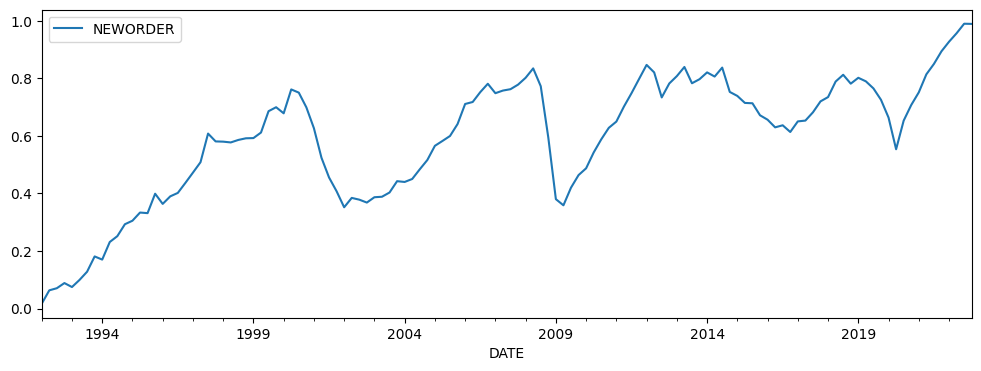

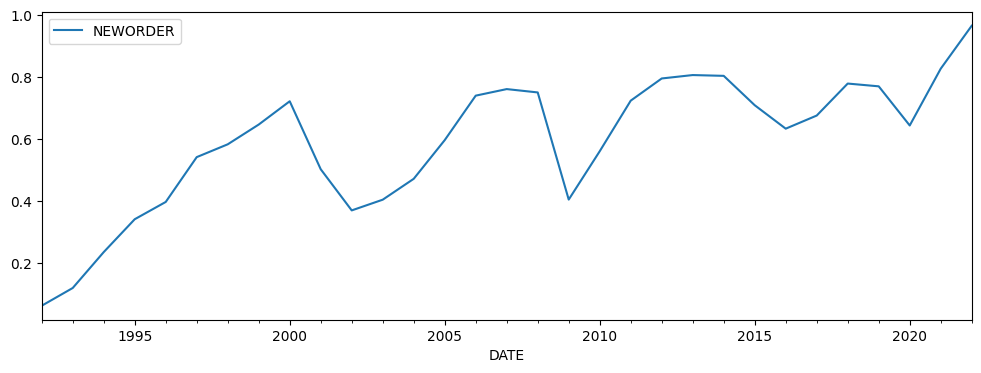

In [7]:
# df_weekly.plot(figsize = plotsize)
# plt.show()

df_monthly.plot(figsize = plotsize)
plt.show()

df_quarterly.plot(figsize = plotsize)
plt.show()

df_yearly.plot(figsize = plotsize)
plt.show()

### 3.2 Auto correlation observation

Text(0.5, 1.0, 'Lag plot with lag = 1')

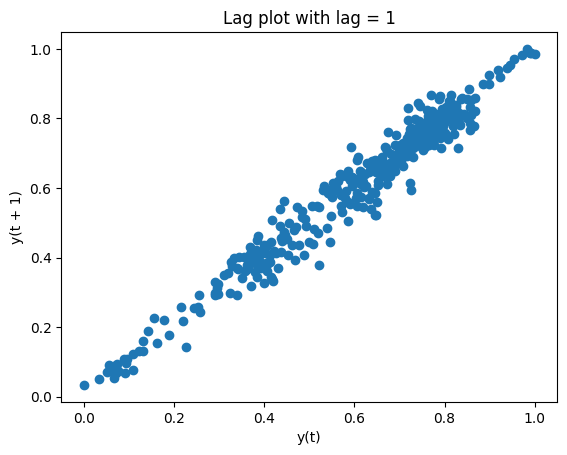

In [8]:
from pandas.plotting import lag_plot

lag_plot(df_monthly)
plt.title('Lag plot with lag = 1')

The linear trend shows that data is not random.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

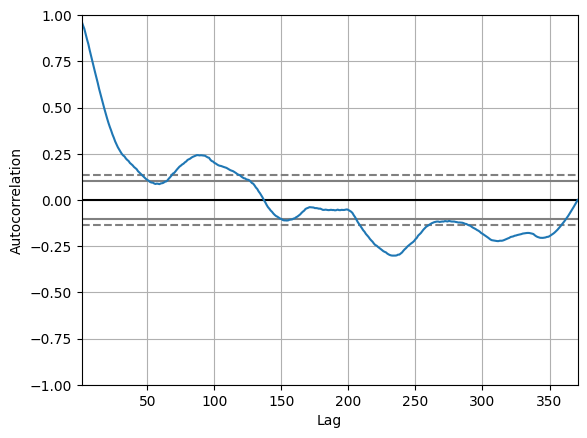

In [9]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_monthly)

This is between the weak-moderate autocorrelation signature, which in turns provides the moderate predictability when using proper model.

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


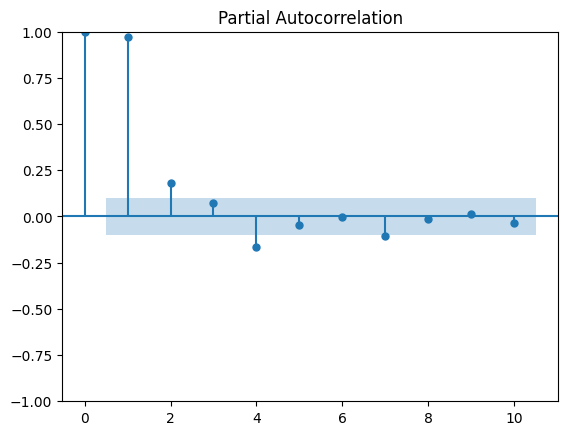

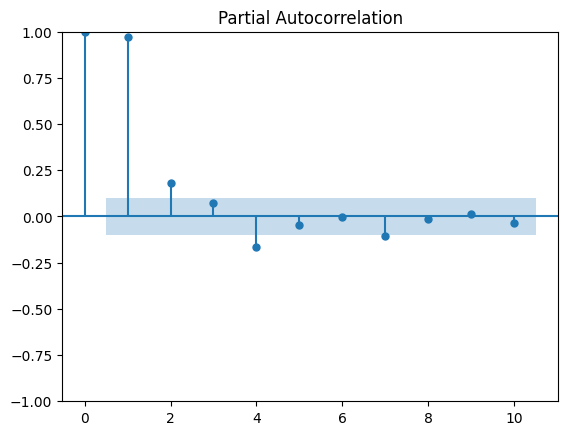

In [10]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_monthly, lags=10)

It shows the significant autocorrelation at lag = 2. An autoregressive models AR(2) and AR(3) are worth to observe.

### 3.3 Probabilistic Criteria for Recession

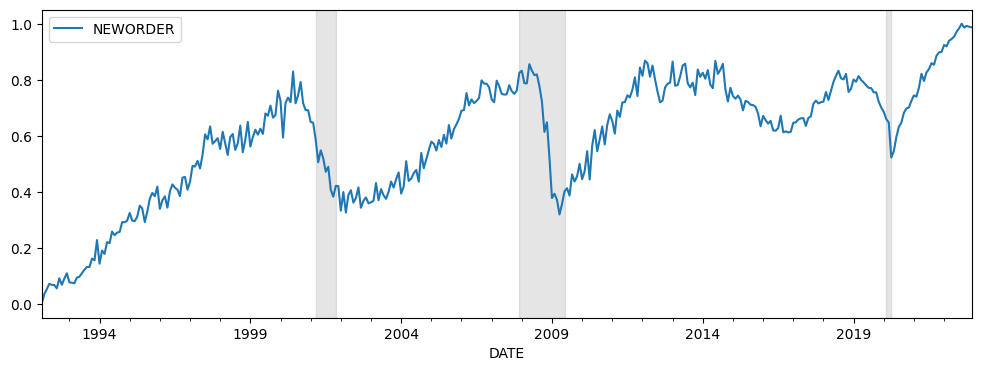

In [26]:
df_monthly.plot(figsize = plotsize)

recession = [('1953-07-01', '1954-05-01'),('1957-08-01', '1958-04-01'),('1960-04-01', '1961-02-01'),('1969-12-01', '1970-11-01'),('1973-11-01', '1975-03-01'),('1980-01-01', '1980-07-01'),('1981-07-01', '1982-11-01'),('1990-07-01', '1991-03-01'),('2001-03-01', '2001-11-01'),('2007-12-01', '2009-06-01'),('2020-02-01', '2020-04-01')]

for period in recession:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

### 3.4 Time series forcast

In [11]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_monthly, autolag = 'AIC')

print('ADF:', dftest[0])
print('P-value:', dftest[1])
print('Num of Lags:', dftest[2])
print('Num of observations for ADF regression and critical values:', dftest[3])
print('Critical values:')

for key, val in dftest[4].items():
  print("\t",key,':',val)

ADF: -2.484638512374589
P-value: 0.11925681875850935
Num of Lags: 6
Num of observations for ADF regression and critical values: 364
Critical values:
	 1% : -3.4484434475193777
	 5% : -2.869513170510808
	 10% : -2.571017574266393


In [16]:
#Auto Regression
from statsmodels.tsa.ar_model import AutoReg

train_df = df_monthly[:len(df_monthly)-10]
test_df = df_monthly[len(df_monthly)-10:]

AR_model = AutoReg(train_df, lags=6).fit()
print(AR_model.summary())

                            AutoReg Model Results                             
Dep. Variable:               NEWORDER   No. Observations:                  361
Model:                     AutoReg(6)   Log Likelihood                 649.209
Method:               Conditional MLE   S.D. of innovations              0.039
Date:                Sun, 09 Apr 2023   AIC                          -1282.418
Time:                        12:27:07   BIC                          -1251.441
Sample:                    08-31-1992   HQIC                         -1270.094
                         - 02-28-2022                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0169      0.006      2.640      0.008       0.004       0.029
NEWORDER.L1     0.6551      0.053     12.351      0.000       0.551       0.759
NEWORDER.L2     0.2542      0.063      4.023    

In [17]:
AR_pred = AR_model.predict(start=len(train_df), end=len(df_monthly)-1, dynamic=False)

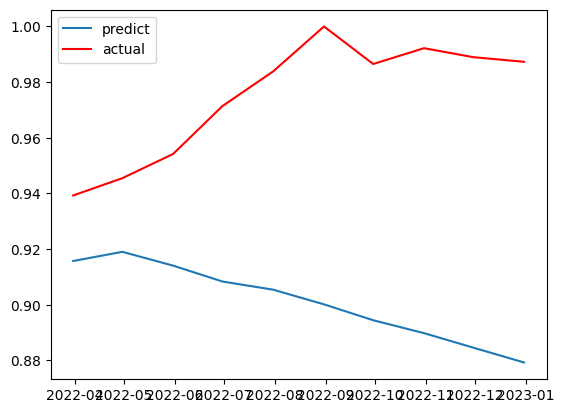

In [22]:
plt.plot(AR_pred, label='predict')
plt.plot(test_df, color='red', label='actual')
plt.legend()

In [25]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(AR_pred, test_df))
print(rmse)

0.08032310864812599


In [ ]:
# Not finished yet: other methods to observe